<a href="https://colab.research.google.com/github/Srivishnu27feb/Object-Detection---OpenCV/blob/master/Object_Detection_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
Model = "/content/drive/My Drive/Colab Notebooks/Object detection - opencv/MobileNetSSD_deploy.caffemodel"
protext = "/content/drive/My Drive/Colab Notebooks/Object detection - opencv/MobileNetSSD_deploy.prototxt.txt"
image = "/content/drive/My Drive/Colab Notebooks/Object detection - opencv/example_01.jpg"

In [2]:
import numpy as np
#import argparse
import cv2

The pretrained caffe model is trained with only the below classes so right now this could detect only the trained ones 

In [6]:
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]

Generate Random 3 colour for these 21 classes

In [9]:
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))
COLORS

array([[168.22157855,  62.45202473, 239.31190285],
       [248.9382756 , 122.13758004, 129.57333619],
       [ 76.3858667 ,  51.15357114,  93.79190071],
       [222.84964674, 200.71470888, 186.09747971],
       [157.16012373,  73.28443151, 122.30526286],
       [215.11347445, 112.34475764,  36.70864368],
       [ 91.09980386, 216.0398191 , 109.54795874],
       [128.28220917,  79.98988095, 246.03318574],
       [ 32.28763365,  23.4940351 , 238.09777744],
       [128.7886882 , 162.35041928, 204.20186123],
       [213.55457084,  34.06868502, 112.72736143],
       [209.99223588, 195.896485  , 159.29062923],
       [190.11781235, 237.554759  ,  82.34521119],
       [ 35.141099  , 139.99658331, 154.42337229],
       [ 69.24292953,  34.54766382, 141.4349709 ],
       [ 49.40504946, 100.61656825, 226.79875337],
       [224.52701801, 207.18400927,  14.36633176],
       [227.19867854, 172.27396534,  35.24597913],
       [212.03102846, 160.1683581 ,  71.4808561 ],
       [203.2162396 , 242.50604

**Reading the model and Image**

  Model : Pretrained Model weight

  Protext: MobileNet Architecture

  h,w: height and width of the test image

In [51]:
net = cv2.dnn.readNetFromCaffe(protext, Model)
image = cv2.imread(image)
(h, w) = image.shape[:2]

Blob (Scaling the image by differencing the mean & dividing it by SD)- Image resize, scalefactor (0.007843), 127.5 the mean difference from the image (R,B,G) and since the mean difference is same we dont have to interchange R & G

In [12]:
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

Pass the input rescaled image to the network

In [13]:
net.setInput(blob)
detections = net.forward()

No of detections: detections.shape[2]

Predicted Class : detections[0, 0, 1, 1]

Confidence Value of the detected class: [0, 0, 1, 2]

X,Y margin of the detected class: [0, 0, 1, 3:7]

In [18]:
i = detections.shape[2]

100

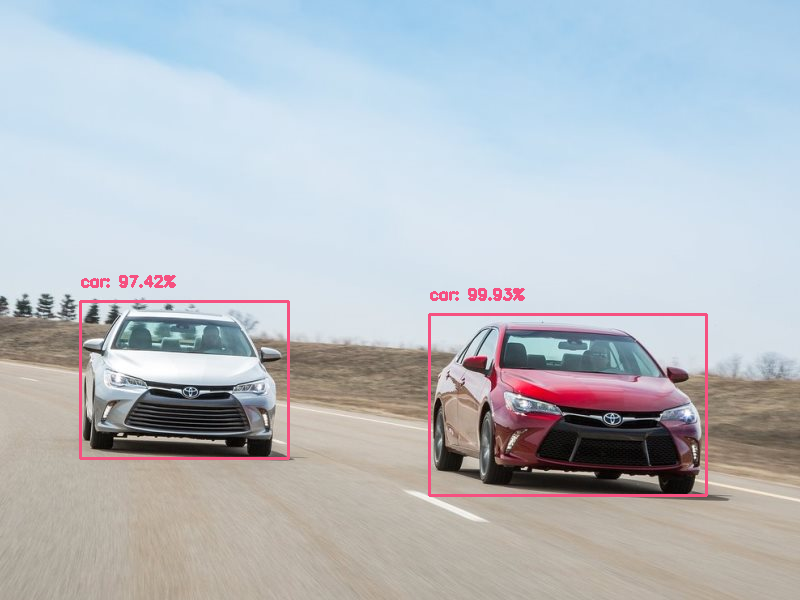

In [55]:
for i in range(0,detections.shape[2]):
  confidence = detections[0, 0, i, 2]
  class_idx = int(detections[0, 0, 1, 1])
  if confidence>0.2:
    box = detections[0, 0, i, 3:7]* np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    label = "{}: {:.2f}%".format(CLASSES[class_idx], confidence * 100)
    ##Create rectangle for the predicted bounding box
    cv2.rectangle(image, (startX, startY), (endX, endY),
			COLORS[class_idx], 2)
    ##project the text above the rectangle box
    y = startY - 15 if startY - 15>15 else startY + 15
    ##Create text with confidence value and the predicted output
    cv2.putText(image, label, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[int(detections[0, 0, 1, 1])], 2)
    
from google.colab.patches import cv2_imshow
cv2_imshow(image)
  

